<a href="https://colab.research.google.com/github/barkhahbpp/deepsedataset/blob/main/bert_disaster_tweet_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Installing Dependencies #

Install paket dependensi / library yang digunakan untuk NLP Tweet Disaster

In [1]:
!pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 11.6 MB/s eta 0:00:00


# 2. Dataset #

Link Dataset :

https://github.com/barkhahbpp/tweetdisasterbert.git

Sumber Dataset :

https://www.kaggle.com/datasets/vstepanenko/disaster-tweets

https://www.kaggle.com/datasets/vbmokin/nlp-with-disaster-tweets-cleaning-data

**Data Descripstion**

|Field name|Description|
|--- |--- |
|id	|A unique identifier for each tweet |
|keyword	|A particular keyword from the tweet |
|location	|The location the tweet was sent from (may be blank) |
|text| The text of the tweet|
|target| Denotes whether a tweet is about a real disaster (1) or not (0)|

## 2.1. Data Loading ##

In [2]:
import numpy as np
import pandas as pd

In [3]:
dataseturl = "https://raw.githubusercontent.com/barkhahbpp/tweetdisasterbert/main/dataset/tweets.csv"
twdisaster_df = pd.read_csv(dataseturl)
twdisaster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


## 2.2. Explanatory Data Analysis ##

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
twdisaster_df.head(5)

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [6]:
twdisaster_df.groupby('target').describe()

id                                                           \
         count         mean          std  min      25%     50%      75%   
target                                                                    
0       9256.0  5631.622191  3247.050923  4.0  2853.75  5635.5  8404.50   
1       2114.0  5916.021760  3423.980548  0.0  2714.50  5930.0  9131.75   

                 
            max  
target           
0       11368.0  
1       11369.0

In [7]:
twdisaster = len(twdisaster_df.loc[twdisaster_df['target']==1])
twnotdisaster = len(twdisaster_df.loc[twdisaster_df['target']==0])


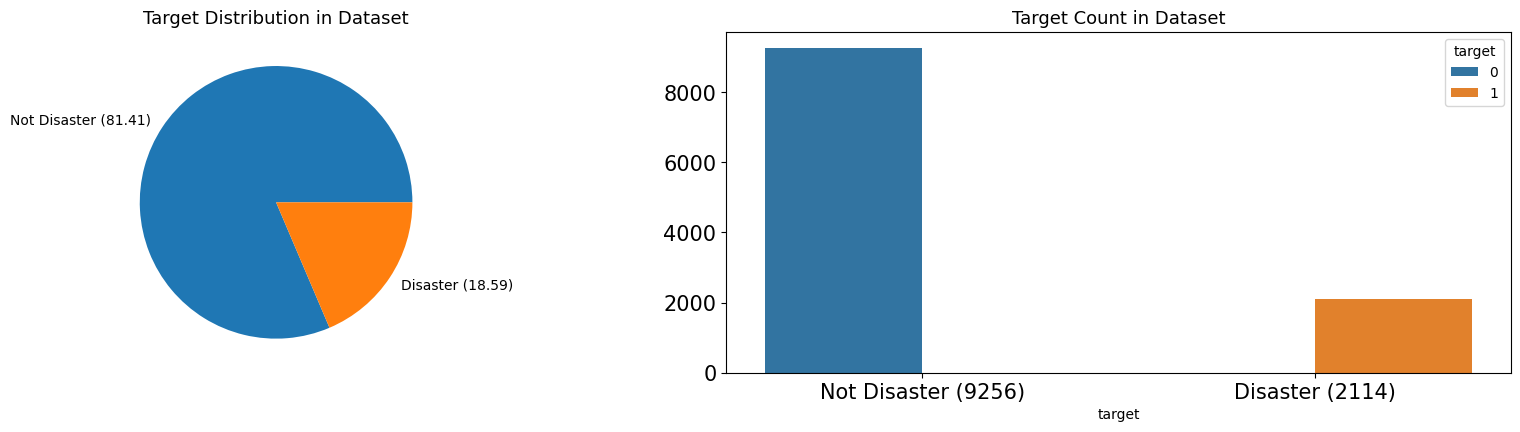

In [8]:
prop_disaster = twdisaster / len(twdisaster_df) * 100
prop_notdisaster = twnotdisaster / len(twdisaster_df) * 100

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

twdisaster_df.groupby('target').count()['id'].plot(kind='pie', ax=axes[0], labels=['Not Disaster ('+'{:.2f}'.format(prop_notdisaster)+')', 'Disaster ('+'{:.2f}'.format(prop_disaster)+')'])
sns.countplot(x=twdisaster_df['target'], hue=twdisaster_df['target'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Not Disaster ('+str(twnotdisaster)+')', 'Disaster ('+str(twdisaster)+')'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution in Dataset', fontsize=13)
axes[1].set_title('Target Count in Dataset', fontsize=13)

plt.show()


## 2.3. Addressing Problem Imbalanced Data ##

According to the dataset analytics, we conlude that the data are imbalanced. Non-disaster data are larger than disaster data. We use the downsampling to balance data between disaster and non-disaster. Downsampling is a technique to handle imbalanced data that reduce the number of samples having the bias.

In [9]:
disaster_df = twdisaster_df[twdisaster_df['target']==1]
disaster_df.shape

(2114, 5)

In [10]:
nondisaster_df = twdisaster_df[twdisaster_df['target']==0]
nondisaster_df.shape

(9256, 5)

In [11]:
downsampled_nondisaster_df = nondisaster_df.sample(disaster_df.shape[0])
downsampled_nondisaster_df.shape

(2114, 5)

In [12]:
balanced_df = pd.concat([disaster_df, downsampled_nondisaster_df])
balanced_df.shape

(4228, 5)

In [13]:
balanced_df['target'].value_counts()

1    2114
0    2114
Name: target, dtype: int64

In [14]:
balanced_df.sample(20)

,id,keyword,location,text,target
9696,9696,suicide%20bomber,"Colorado, USA",Mexican Border City on High Alert Over ‘Suicid...,1
11270,11270,wreck,🍀~Personal & Fan acc,Are you trying to wreck me?? 😭😭😭,1
1530,1530,bombed,"Larkhall, Scotland","Definitely says ""bombed"" now you have a name o...",0
2011,2011,casualties,Prison,This was a war with a lot of casualties... htt...,1
4858,4858,emergency%20services,South Africa - KZN,Gauteng Helicopter Emergency Medical Services:...,1
10908,10908,weapon,"Victoria, Australia",love to see Sorenson as a starter absolute weapon,0
1100,1100,blight,N.E. Florida & FL Keys,Only Leftists would demand exteme birth contro...,0
783,783,bioterror,NaN,"US-Mexico Border: Portal For TB, Swine Flu, Bi...",1
11018,11018,wild%20fires,bts day6 TS redvelvet the🥀,OK so I know you're trying to be shady like bu...,0
6154,6154,harm,Swansea University,Changes to our lives and our bodies as we get ...,0


# 3. Data Preprocessing#

## 3.1. Splitting Train and Test Data

Model will split dataset into training and test. We stratify data sample in which each class have an equal number of samples.

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(balanced_df['text'], balanced_df['target'], stratify=balanced_df['target'])

In [16]:
y_train.value_counts()

0    1586
1    1585
Name: target, dtype: int64

In [17]:
y_test.value_counts()

1    529
0    528
Name: target, dtype: int64

# 4. Developing BERT Model

In this part, we employ BERT Preprocessing model and Bert Encoder from Tensorflow_hub.

In [18]:
import tensorflow_hub as hub
import tensorflow_text as text

## 4.1. Sentence Embedding

In [50]:
preprocess_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
# encoder_url = 'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/4'
encoder_url = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/2'

bert_preprocess = hub.KerasLayer(preprocess_url)
bert_encoder = hub.KerasLayer(encoder_url)

In [51]:
def get_sentence_embeding(sentences):
  preproc_text = bert_preprocess(sentences)
  return bert_encoder(preproc_text)['pooled_output']

In [52]:
# get_sentence_embeding(
#     ["Are you speaking about the atrocities and annihilation of Christians across the Middle East committed by Muslims daily?",
#      "Piscataway land // DC,this is an unfathomable number. I lived through a large earthquake and we slept under the table for one terrible night…"
#     ])

get_sentence_embeding(
    ["Are you speaking about the atrocities and annihilation of Christians across the Middle East committed by Muslims daily?",
     "Piscataway land // DC,this is an unfathomable number. I lived through a large earthquake and we slept under the table for one terrible night…"
    ])

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[-0.2286333 , -0.3659288 , -0.4097298 , ..., -0.06806725,
        -0.3766694 , -0.17801426],
       [-0.36531276, -0.08574688, -0.99161583, ...,  0.0127456 ,
        -0.26177835, -0.12990755]], dtype=float32)>

## 4.2. Deep Learning Model

In [65]:
import tensorflow as tf

# BERT Model
text_input_layer = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input_layer)
bert_output = bert_encoder(preprocessed_text)

#Neural Network Layers
layer = tf.keras.layers.Dropout(0.1, name="dropout")(bert_output['pooled_output'])
layer = tf.keras.layers.Dense(8, activation='relu', name='hidden1')(layer)
layer = tf.keras.layers.Dense(5, activation='relu', name='hidden2')(layer)
layer = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(layer)

#Final Model
model = tf.keras.Model(inputs=[text_input_layer], outputs=[layer])


In [66]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer_2 (KerasLayer)  {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                            

In [67]:
len(X_train)

3171

In [68]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

# 5. Train The Model

## 5.1. Fit Model ##

In [69]:
model.fit(X_train, y_train, epochs=80)

Epoch 1/80
100/100 [==============================] - 17s 145ms/step - loss: 0.6135 - accuracy: 0.6556 - precision: 0.6990 - recall: 0.5464
Epoch 2/80
100/100 [==============================] - 14s 137ms/step - loss: 0.4915 - accuracy: 0.7748 - precision: 0.7713 - recall: 0.7811
Epoch 3/80
100/100 [==============================] - 14s 136ms/step - loss: 0.4667 - accuracy: 0.7900 - precision: 0.7940 - recall: 0.7830
Epoch 4/80
100/100 [==============================] - 16s 156ms/step - loss: 0.4629 - accuracy: 0.7912 - precision: 0.7953 - recall: 0.7842
Epoch 5/80
100/100 [==============================] - 14s 138ms/step - loss: 0.4549 - accuracy: 0.7934 - precision: 0.7958 - recall: 0.7893
Epoch 6/80
100/100 [==============================] - 14s 145ms/step - loss: 0.4515 - accuracy: 0.7991 - precision: 0.8008 - recall: 0.7962
Epoch 7/80
100/100 [==============================] - 14s 136ms/step - loss: 0.4419 - accuracy: 0.8067 - precision: 0.8123 - recall: 0.7975
Epoch 8/80
100/100 [

In [70]:
model.evaluate(X_test, y_test)

34/34 [==============================] - 5s 126ms/step - loss: 0.4315 - accuracy: 0.8098 - precision: 0.7867 - recall: 0.8507


[0.4314865171909332,
 0.8098391890525818,
 0.7867133021354675,
 0.8506616353988647]

## 5.2. Predict Model

In [71]:
y_predict = model.predict(X_test)

34/34 [==============================] - 5s 128ms/step


In [72]:
y_predict = y_predict.flatten()
y_predict

array([0.50612813, 0.97873414, 0.1477338 , ..., 0.96064264, 0.21433896,
       0.9357868 ], dtype=float32)

In [73]:
y_predict = np.where(y_predict > 0.5, 1, 0)
y_predict

array([1, 1, 0, ..., 1, 0, 1])

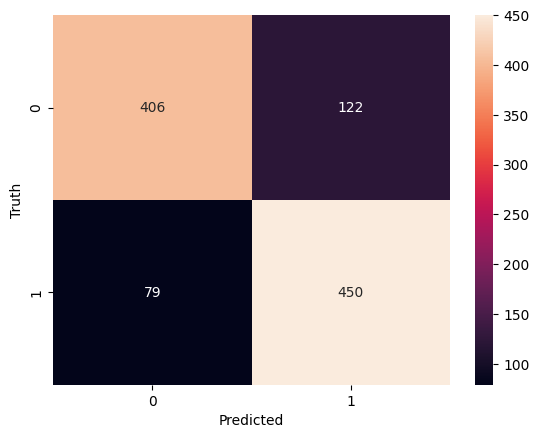

In [75]:
from sklearn.metrics import confusion_matrix, classification_report

cmtrix = confusion_matrix(y_test, y_predict)
sns.heatmap(cmtrix, annot=True, fmt='d')

plt.xlabel("Predicted")
plt.ylabel("Truth")

plt.show()

In [76]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       528
           1       0.79      0.85      0.82       529

    accuracy                           0.81      1057
   macro avg       0.81      0.81      0.81      1057
weighted avg       0.81      0.81      0.81      1057

